In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [19]:
rating = pd.read_csv('ratings.csv')

rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [3]:
mov = pd.read_csv('movies.csv')

In [20]:
rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000095 entries, 0 to 25000094
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB


In [8]:
print('Num. of Users: '+ str(rating['userId'].nunique()))
print('Num of Movies: '+ str(rating['movieId'].nunique()))

Num. of Users: 162541
Num of Movies: 59047


In [10]:
mov['genres'] = mov['genres'].apply(lambda x: x.split('|'))

In [13]:
gen = pd.get_dummies(mov['genres'].apply(pd.Series).stack(), drop_first=True).sum(level=0)

C:\Users\harsh\AppData\Local\Temp\ipykernel_20600\2185433850.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  gen = pd.get_dummies(mov['genres'].apply(pd.Series).stack(), drop_first=True).sum(level=0)


In [15]:
rating.drop('genres', axis=1, inplace=True)

In [17]:
mov = pd.concat([mov, gen], axis=1)

In [22]:
mov.drop('genres', axis=1, inplace=True)

In [24]:
rating = pd.merge(rating, mov, on='movieId')

rating.head()

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,296,5.0,1147880044,Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,296,5.0,1439474476,Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,4,296,4.0,1573938898,Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,5,296,4.0,830786155,Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,7,296,4.0,835444730,Pulp Fiction (1994),0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

<AxesSubplot:xlabel='rating', ylabel='count'>

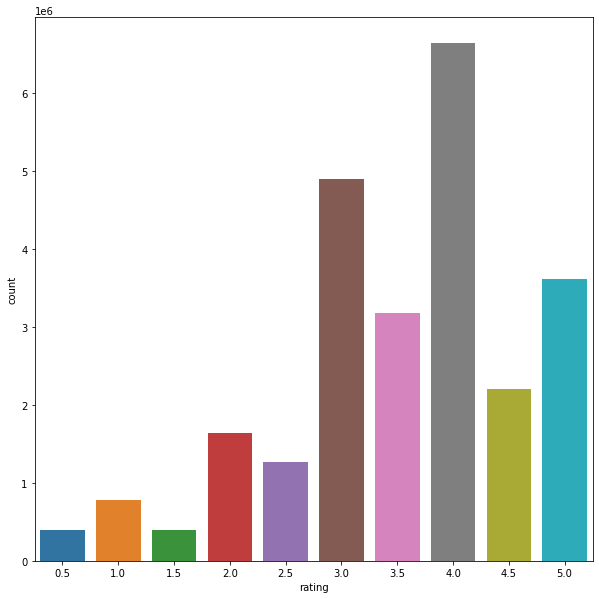

In [34]:
plt.figure(figsize=(10, 10))
sns.countplot(x='rating', data=rating)

In [83]:
ratedmovies = rating[['title', 'rating']].groupby('title').mean().sort_values('rating' ,ascending=False)

In [39]:
ratedmovies.head(10)

,rating
title,
Full of Grace (2015),5.0
Geordie (1955),5.0
Garfield In Paradise (1986),5.0
Lost Woods (2012),5.0
Garfield in the Rough (1984),5.0
Lost Time (2014),5.0
Who Killed Chea Vichea? (2010),5.0
Lost Rivers (2013),5.0
Who Killed Johnny (2013),5.0


In [44]:
ratedmovies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58958 entries, Full of Grace (2015) to Robot Wars (1993)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  58958 non-null  float64
dtypes: float64(1)
memory usage: 2.9+ MB


<AxesSubplot:xlabel='rating', ylabel='Count'>

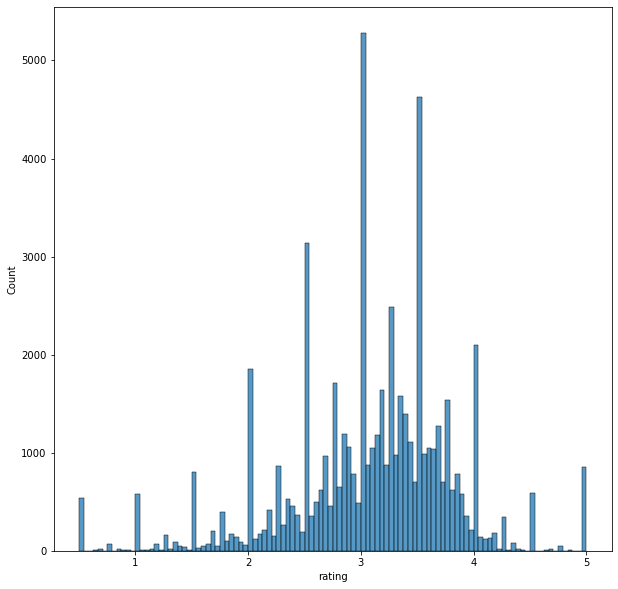

In [46]:
plt.figure(figsize=(10, 10))
sns.histplot(x='rating', data=ratedmovies)

In [92]:
ratedtime = rating[['title', 'rating']].groupby('title').count().sort_values('rating' ,ascending=False)

In [106]:
ratedtime.head()

,Number of Ratings
title,
Forrest Gump (1994),81491
"Shawshank Redemption, The (1994)",81482
Pulp Fiction (1994),79672
"Silence of the Lambs, The (1991)",74127
"Matrix, The (1999)",72674


In [105]:
ratedmovies.head()

,rating
title,
Full of Grace (2015),5.0
Geordie (1955),5.0
Garfield In Paradise (1986),5.0
Lost Woods (2012),5.0
Garfield in the Rough (1984),5.0


<AxesSubplot:xlabel='rating', ylabel='Count'>

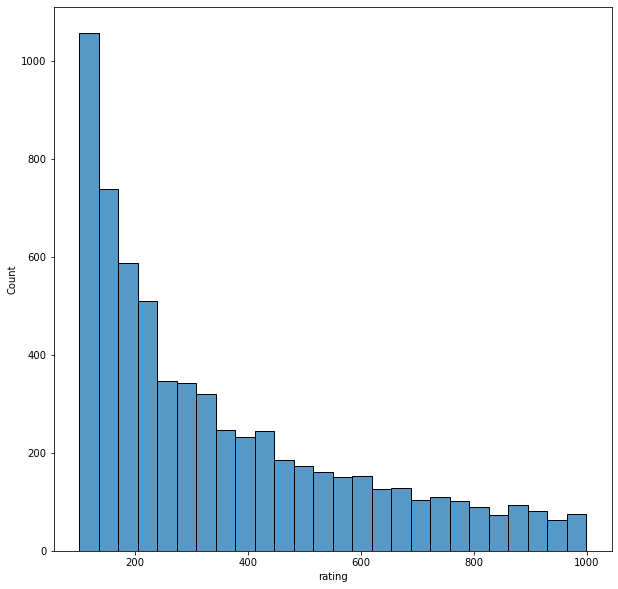

In [61]:
plt.figure(figsize=(10, 10))
sns.histplot(xratedtime['rating'].apply(lambda x: x if (x<1000 and x>100) else None))

In [104]:
ratedtime.rename({'rating': 'Number of Ratings'}, axis=1, inplace=True)

In [72]:
(ratedtime['Number of Ratings']>50000).sum()

22

In [79]:
ratedmovies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58958 entries, Forrest Gump (1994) to "BLOW THE NIGHT!" Let's Spend the Night Together (1983)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  58958 non-null  int64
dtypes: int64(1)
memory usage: 921.2+ KB


In [90]:
ratedtime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58958 entries, Forrest Gump (1994) to "BLOW THE NIGHT!" Let's Spend the Night Together (1983)
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Number of Ratings  58958 non-null  int64
dtypes: int64(1)
memory usage: 2.9+ MB


In [108]:
movierate = pd.concat([ratedmovies, ratedtime], axis=1)

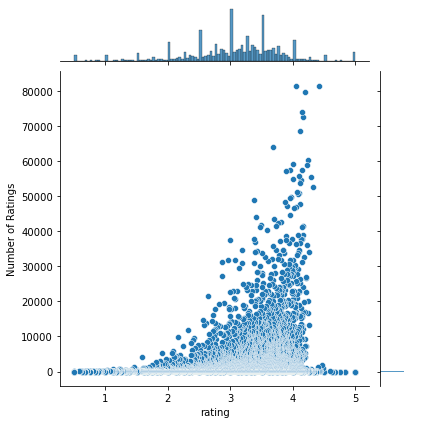

In [111]:
sns.jointplot(x='rating', y='Number of Ratings', data=movierate)

In [116]:
genrelist = "Action Adventure Animation Children Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western".split()

In [117]:
genrelist

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [118]:
genrecount = []

for i in genrelist:
    genmov = rating[['movieId','title',i]]
    genmov = genmov[genmov[i] == 1]
    genrecount.append(len(genmov))

In [125]:
gencount = pd.DataFrame([genrelist, genrecount], index=['Genre', 'Count']).transpose()

<AxesSubplot:xlabel='Genre', ylabel='Count'>

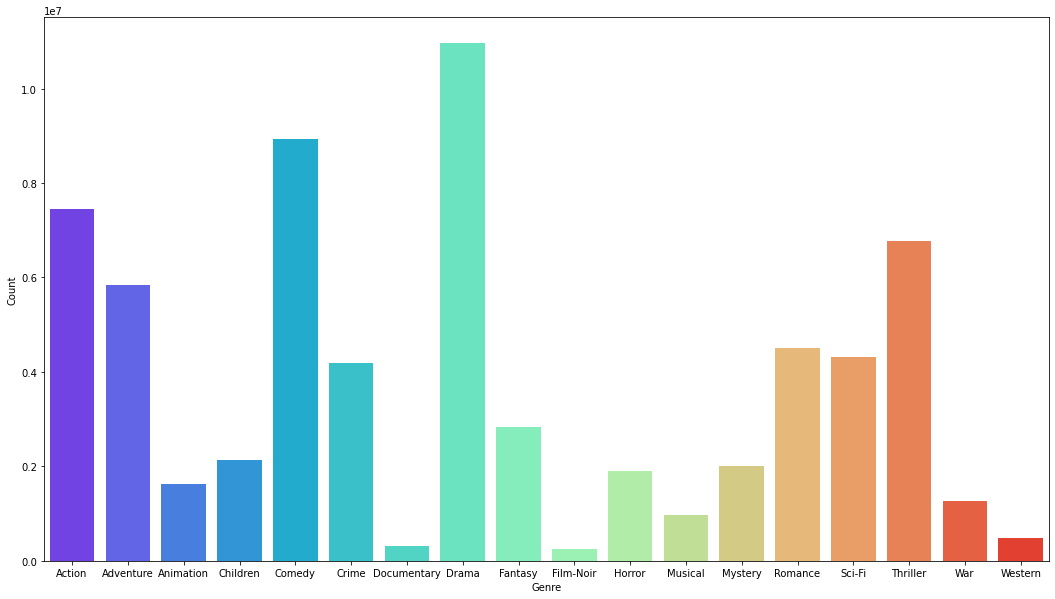

In [131]:
plt.figure(figsize=(18, 10))
sns.barplot(x='Genre', y='Count', data=gencount, palette='rainbow')

In [139]:
mov

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62419,209159,Window of the Soul (2001),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62420,209163,Bad Poems (2018),0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62421,209169,A Girl Thing (2001),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
final = pd.merge(mov, movierate, on='title')

In [148]:
final[final['Number of Ratings']>500].sort_values('rating', ascending=False).head(10)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,Number of Ratings
42988,171011,Planet Earth II (2016),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.483096,1124
38400,159817,Planet Earth (2006),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.464797,1747
314,318,"Shawshank Redemption, The (1994)",0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.413576,81482
42841,170705,Band of Brothers (2001),1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4.398599,1356
841,858,"Godfather, The (1972)",0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.324336,52498
46662,179135,Blue Planet II (2017),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.289833,659
49,50,"Usual Suspects, The (1995)",0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,4.284353,55366
1191,1221,"Godfather: Part II, The (1974)",0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.261759,34188
39934,163809,Over the Garden Wall (2013),0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.258242,546
1932,2019,Seven Samurai (Shichinin no samurai) (1954),1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.254769,13367


In [150]:
final[(final['Action']==1) & (final['Number of Ratings']>500)].sort_values('rating', ascending=False)['title'].head(10)

42841                              Band of Brothers (2001)
1932           Seven Samurai (Shichinin no samurai) (1954)
2871                                     Fight Club (1999)
888                              North by Northwest (1959)
5912                   City of God (Cidade de Deus) (2002)
2941                                        Yojimbo (1961)
12231                              Dark Knight, The (2008)
14945                                     Inception (2010)
2482                                    Matrix, The (1999)
1167     Star Wars: Episode V - The Empire Strikes Back...
Name: title, dtype: object

### In this way, we can recommend 10 movies to users according to their genre preferences.